# Dataset Exploration Slide Deck: PISA 2012
## by Tien-Thanh Nguyen

## Investigation Overview

This investigation of PISA dataset to determine which is the effect of gender, immigration status and parent to the scores of students.

## Dataset Overview

The Programme for International Student Assessment (PISA) is a international survey which aims to evaluate education systems worldwide by testing the skills and knowledge of 15-year-old students who are nearing the end of their compulsory education. PISA assesses how well they can apply what they learn in school to real-life situations.

This dataset contains the result of the survey for 2012.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
pisa=pd.read_csv('pisa2012_clean.csv')

## Effect of Gender to the score

In overall, Female seems to score higher than Male expecisally in Reading, however, Male is better in average in Math.

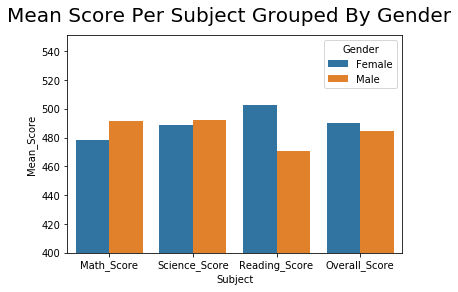

In [3]:
# compute the mean scores and an overall mean
df_gender_comparison = pisa.groupby(['Gender'])[['Math_Score','Science_Score','Reading_Score','Overall_Score']].mean().reset_index()
# initiate the output dataframe
cols = ['Gender','Subject','Mean_Score']
df_gender = pd.DataFrame(columns=cols)
for index, row in df_gender_comparison.iterrows(): 
    for columnname in ['Math_Score','Science_Score','Reading_Score','Overall_Score']:
        df_gender = df_gender.append({'Gender': row['Gender'],
                                 'Subject': columnname,
                                 'Mean_Score': row[columnname]}, ignore_index=True)

sns.barplot(x="Subject",y="Mean_Score",hue="Gender",data=df_gender)
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Gender', fontsize=20)
plt.ylim(400, 550 + 1);

## Immigration status vs Score

Native student perform better than non native student. But the gap is quite small in average.

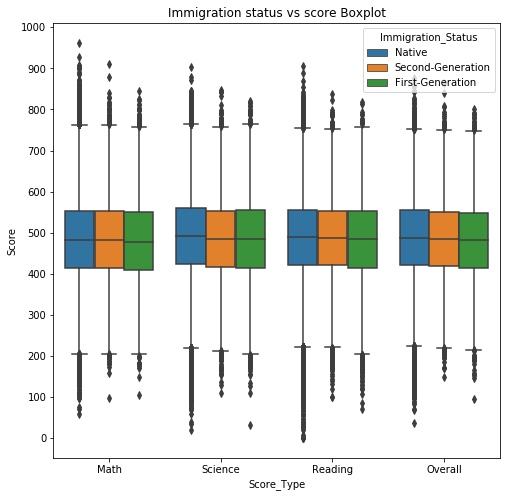

In [5]:
data = pd.melt(pisa, id_vars=['Student_Id', 'Gender', 'Country', 'Study_Time_With_Parent', 'Parents_Highest_Education', 'Immigration_Status', 'Parents_Presence'], 
               value_vars=['Math_Score','Science_Score','Reading_Score','Overall_Score'], 
               var_name="Score_Type", value_name='Score')
data['Score_Type'] = data['Score_Type'].replace('Math_Score','Math').replace('Science_Score','Science').replace('Reading_Score','Reading').replace('Overall_Score', 'Overall')

plt.figure(figsize=[8, 8]);
sns.boxplot(x = data['Score_Type'], y = data['Score'], hue=data['Immigration_Status'])
plt.title('Immigration status vs score Boxplot');
y_ticks = np.arange(0, 1000 + 1, 100)
plt.yticks(y_ticks, y_ticks);

## Parent presence has huge effect on study of children

Students with both parents presence score more than 30 points higher than students don't have both parents presence.

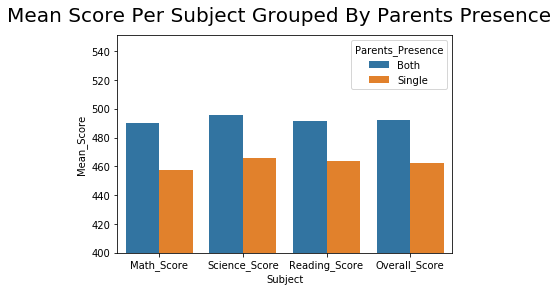

In [6]:
# compute the mean scores and an overall mean
df_status_comparison = pisa.groupby(['Parents_Presence'])[['Math_Score','Science_Score','Reading_Score','Overall_Score']].mean().reset_index()
# initiate the output dataframe
cols = ['Parents_Presence','Subject','Mean_Score']
df_status = pd.DataFrame(columns=cols)
for index, row in df_status_comparison.iterrows(): 
    for columnname in ['Math_Score','Science_Score','Reading_Score','Overall_Score']:
        df_status = df_status.append({'Parents_Presence': row['Parents_Presence'],
                                 'Subject': columnname,
                                 'Mean_Score': row[columnname]}, ignore_index=True)

sns.barplot(x="Subject",y="Mean_Score",hue="Parents_Presence",data=df_status)
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Parents Presence', fontsize=20)
plt.ylim(400, 550 + 1);

# However, studying with children is not a good idea

The studying time of parent with students has negative effect on the score. 

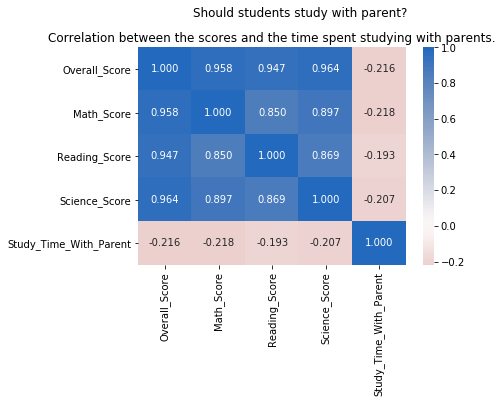

In [7]:
pisa_drop = pisa[pisa['Study_Time_With_Parent'] < 10]
ax = sns.heatmap(pisa_drop[['Overall_Score','Math_Score','Reading_Score', 'Science_Score', 'Study_Time_With_Parent']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
ax.set(title='Correlation between the scores and the time spent studying with parents.')

plt.suptitle("Should students study with parent?", y=1.02);


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!